In [17]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
chunksize = 10000000
train = pd.read_csv('../data/train_data.csv',sep='|',chunksize=chunksize)   

In [3]:
train_sample = pd.DataFrame()
for chunk in train:
#     print('len chunk',len(chunk))
    tmp = chunk[chunk['pt_d']>5]
    train_sample = pd.concat([train_sample,tmp]).reset_index(drop=True)
    print('len train_sample',len(tmp),len(train_sample))
   

len train_sample 0 0
len train_sample 1113247 1113247
len train_sample 1996339 3109586
len train_sample 7010442 10120028
len train_sample 1907133 12027161


In [4]:
# train_sample.info()

In [5]:
%time test = pd.read_csv('../data/test_data_B.csv',sep='|')


Wall time: 2.17 s


In [11]:
len(test)

1000000

In [6]:
del test['id']

In [7]:
# test.info()

In [9]:
train_test_sample = pd.concat([train_sample,test],sort=False).reset_index(drop=True)


In [10]:
len(train_test_sample)

13027161

In [18]:
# 内存压缩
def data_compression(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in tqdm(df.columns):
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [19]:
train_test_sample = data_compression(train_test_sample)
train_test_sample.info()

  0%|                                                                                           | 0/36 [00:00<?, ?it/s]

Memory usage of dataframe is 3578.02 MB


100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:29<00:00,  1.23it/s]


Memory usage after optimization is: 571.58 MB
Decreased by 84.0%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13027161 entries, 0 to 13027160
Data columns (total 36 columns):
label                          float16
uid                            int32
task_id                        int16
adv_id                         int16
creat_type_cd                  int8
adv_prim_id                    int16
dev_id                         int8
inter_type_cd                  int8
slot_id                        int8
spread_app_id                  int8
tags                           int8
app_first_class                int8
app_second_class               int8
age                            int8
city                           int16
city_rank                      int8
device_name                    int8
device_size                    int16
career                         int8
gender                         int8
net_type                       int8
residence                      int8
his_app_size       

In [20]:
train_test_sample.to_pickle('../data/train67_test_B.pickle')

In [10]:
train_test_sample.head(5)

,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,...,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d
0,0.0,2162947,5936,2934,6,126,19,5,18,57,...,10,2,20,1,-1,2,8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,9,46,6
1,0.0,1802604,4189,6509,7,122,18,5,16,56,...,14,5,20,1,-1,2,2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^...,13,14,6
2,0.0,2221433,1689,2069,3,142,36,5,12,80,...,15,4,18,-1,-1,2,11^12^13^14^15^16^17^18^19^20^21^22^23,7,42,6
3,1.0,2100689,2926,4168,3,142,36,5,12,80,...,13,2,18,-1,-1,5,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,12,42,6
4,0.0,2101862,1086,1219,5,142,36,5,18,80,...,15,4,16,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,42,6


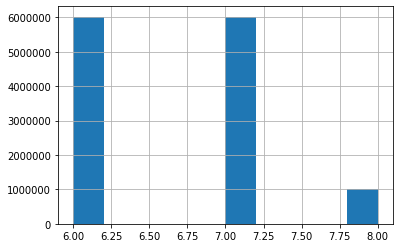

In [11]:
train_test_sample['pt_d'].hist()